# Create Synthetic data with Scikit-Learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import tensorflow as tf
import math
import torch
from torch import nn
from torch.nn import functional as F
from torch.autograd import Variable 
from pyswarm import pso
from pyswarms.utils.functions import single_obj as fx
from torchswarm.swarmoptimizer import SwarmOptimizer
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from pyswarm import pso
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier 
from skmultiflow.drift_detection.adwin import ADWIN
from sklearn.metrics import classification_report, accuracy_score  

C:\Users\Jenny.Son\Anaconda3\envs\geoenv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


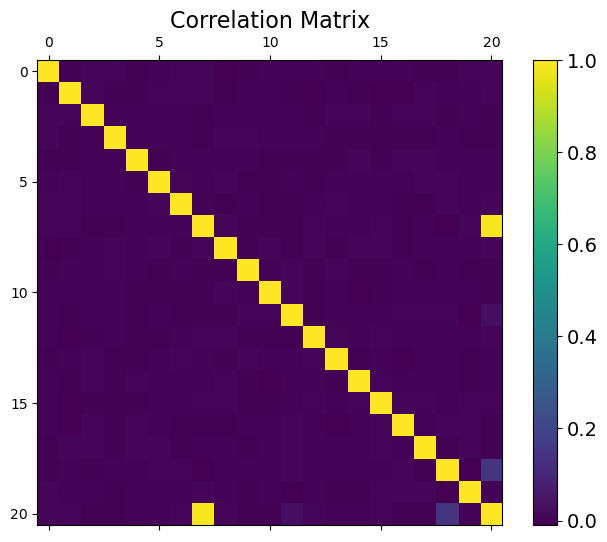

In [2]:
#Create synthetic dataset n=100,000

from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

fig = plt.figure(figsize=(8, 6))

X, y = datasets.make_regression(n_samples=100000, n_features=20,n_informative=3, noise=0.2, random_state=0)

reg_df = pd.DataFrame(X, columns=['Ft %i' % i for i in range(20)])

reg_df['y'] = y


plt.matshow( reg_df.corr(), fignum=fig.number )

cb = plt.colorbar()

cb.ax.tick_params(labelsize=14)

plt.title('Correlation Matrix', fontsize=16);

In [3]:
reg_df.head()

,Ft 0,Ft 1,Ft 2,Ft 3,Ft 4,Ft 5,Ft 6,Ft 7,Ft 8,Ft 9,...,Ft 11,Ft 12,Ft 13,Ft 14,Ft 15,Ft 16,Ft 17,Ft 18,Ft 19,y
0,0.095919,-0.423037,-0.442890,1.090022,-0.152942,0.389927,0.778577,-1.606071,-1.719777,-0.682784,...,-0.846742,-0.536408,0.617966,-2.076478,-1.393827,-0.586624,1.436037,-0.547876,0.266298,-150.936903
1,1.583435,1.018668,-0.720922,-0.244310,1.253598,-2.539403,-0.259522,0.748799,-1.665924,0.410005,...,0.389745,-1.771419,-0.929791,-1.449729,-0.399689,0.700303,-0.036314,-0.335165,1.114595,62.218804
2,-0.508880,-0.521527,0.803520,-0.801734,1.422718,0.175577,-0.707498,1.339567,1.348834,-0.639263,...,-0.851887,-1.001282,0.297575,0.531136,1.788919,2.480756,1.160944,-0.465766,-1.082452,109.633409
3,-1.166977,-0.355907,-0.662056,-1.445938,-0.153738,-0.754327,-0.926727,0.183930,0.706904,-1.219465,...,-0.504730,-0.427968,-0.741758,1.334374,-1.578027,1.133695,-0.256385,-0.806075,0.133497,3.528769
4,1.063646,-1.672744,-0.203874,-0.402066,-0.705870,0.937375,1.282866,-0.621621,0.037830,-0.524733,...,1.307663,-1.099398,-1.263728,0.337824,0.081649,1.514806,0.400778,1.708172,0.202004,-28.323967


In [4]:
reg_df.shape

(100000, 21)

In [5]:
reg_df.describe

<bound method NDFrame.describe of            Ft 0      Ft 1      Ft 2      Ft 3      Ft 4      Ft 5      Ft 6  \
0      0.095919 -0.423037 -0.442890  1.090022 -0.152942  0.389927  0.778577   
1      1.583435  1.018668 -0.720922 -0.244310  1.253598 -2.539403 -0.259522   
2     -0.508880 -0.521527  0.803520 -0.801734  1.422718  0.175577 -0.707498   
3     -1.166977 -0.355907 -0.662056 -1.445938 -0.153738 -0.754327 -0.926727   
4      1.063646 -1.672744 -0.203874 -0.402066 -0.705870  0.937375  1.282866   
...         ...       ...       ...       ...       ...       ...       ...   
99995  0.786870 -0.275063 -0.672857 -0.682082  0.007252  0.682746 -0.790448   
99996 -0.027366  0.238537 -1.352382 -0.102612 -0.639795  0.042655 -0.960801   
99997 -0.532444 -0.649359 -0.689119  0.181567 -1.235544  1.096632  1.361258   
99998 -1.436168  1.596766  0.188671  0.900285 -1.102328 -1.393111 -1.386039   
99999 -0.413044 -0.645768  0.174912  0.427556 -0.614412 -0.947684 -0.246290   

           Ft 7  

In [6]:
import pandas as pd
import numpy as np

#Create random date field using range of 2019,2020,2021
reg_df['date'] = np.random.choice(pd.date_range('2019-01-01', '2021-12-31'), 100000)
print(reg_df)


           Ft 0      Ft 1      Ft 2      Ft 3      Ft 4      Ft 5      Ft 6  \
0      0.095919 -0.423037 -0.442890  1.090022 -0.152942  0.389927  0.778577   
1      1.583435  1.018668 -0.720922 -0.244310  1.253598 -2.539403 -0.259522   
2     -0.508880 -0.521527  0.803520 -0.801734  1.422718  0.175577 -0.707498   
3     -1.166977 -0.355907 -0.662056 -1.445938 -0.153738 -0.754327 -0.926727   
4      1.063646 -1.672744 -0.203874 -0.402066 -0.705870  0.937375  1.282866   
...         ...       ...       ...       ...       ...       ...       ...   
99995  0.786870 -0.275063 -0.672857 -0.682082  0.007252  0.682746 -0.790448   
99996 -0.027366  0.238537 -1.352382 -0.102612 -0.639795  0.042655 -0.960801   
99997 -0.532444 -0.649359 -0.689119  0.181567 -1.235544  1.096632  1.361258   
99998 -1.436168  1.596766  0.188671  0.900285 -1.102328 -1.393111 -1.386039   
99999 -0.413044 -0.645768  0.174912  0.427556 -0.614412 -0.947684 -0.246290   

           Ft 7      Ft 8      Ft 9  ...     Ft 12 

In [7]:
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Ft 0    100000 non-null  float64       
 1   Ft 1    100000 non-null  float64       
 2   Ft 2    100000 non-null  float64       
 3   Ft 3    100000 non-null  float64       
 4   Ft 4    100000 non-null  float64       
 5   Ft 5    100000 non-null  float64       
 6   Ft 6    100000 non-null  float64       
 7   Ft 7    100000 non-null  float64       
 8   Ft 8    100000 non-null  float64       
 9   Ft 9    100000 non-null  float64       
 10  Ft 10   100000 non-null  float64       
 11  Ft 11   100000 non-null  float64       
 12  Ft 12   100000 non-null  float64       
 13  Ft 13   100000 non-null  float64       
 14  Ft 14   100000 non-null  float64       
 15  Ft 15   100000 non-null  float64       
 16  Ft 16   100000 non-null  float64       
 17  Ft 17   100000 non-null  float

In [8]:
reg_df.describe()

,Ft 0,Ft 1,Ft 2,Ft 3,Ft 4,Ft 5,Ft 6,Ft 7,Ft 8,Ft 9,...,Ft 11,Ft 12,Ft 13,Ft 14,Ft 15,Ft 16,Ft 17,Ft 18,Ft 19,y
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.000454,-0.000279,0.006928,-0.001918,-0.005230,0.004609,0.002959,0.002289,0.002726,0.001807,...,0.002621,0.000158,0.005251,-0.005898,-0.000161,0.003991,-0.006085,0.001412,-0.001229,0.226691
std,0.997896,1.001694,0.995774,1.001676,0.995484,1.000051,1.001096,1.000331,1.004190,0.998819,...,0.999807,0.998434,0.997798,0.998120,0.998942,0.997209,1.000812,0.999192,1.002317,88.935029
min,-4.212937,-4.852118,-4.168397,-4.519594,-4.516663,-4.820940,-4.344489,-4.531865,-5.002299,-4.375342,...,-4.201677,-4.059838,-4.446632,-4.178338,-4.190742,-4.459891,-4.247118,-4.694588,-4.731776,-411.151450
25%,-0.674798,-0.676732,-0.662331,-0.681015,-0.676432,-0.670558,-0.674300,-0.677065,-0.677034,-0.671719,...,-0.670100,-0.673762,-0.668398,-0.675603,-0.672743,-0.668442,-0.684435,-0.678532,-0.678117,-59.963152
50%,0.002848,-0.001604,0.006563,-0.002382,-0.005125,0.007720,0.002074,0.002740,0.005717,0.000712,...,0.000922,0.001485,0.010553,-0.005402,0.001355,0.004412,-0.004987,0.002357,-0.004430,0.365387
75%,0.674711,0.677671,0.677842,0.673662,0.665052,0.677435,0.676191,0.679686,0.681310,0.675663,...,0.676570,0.677412,0.680917,0.664071,0.673775,0.675546,0.671068,0.677334,0.681583,60.448997
max,4.309028,4.089255,4.116536,4.754939,4.576634,4.280196,4.297206,4.370213,4.019145,4.043318,...,4.796465,4.314986,4.698708,4.492563,4.716662,4.224077,4.279512,4.466612,4.384171,383.577401


In [9]:
# Add a column of random integers to each date entry

reg_df['class'] = np.random.choice([0, 1], size=len(reg_df))


In [10]:
reg_df.describe()

,Ft 0,Ft 1,Ft 2,Ft 3,Ft 4,Ft 5,Ft 6,Ft 7,Ft 8,Ft 9,...,Ft 12,Ft 13,Ft 14,Ft 15,Ft 16,Ft 17,Ft 18,Ft 19,y,class
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.000454,-0.000279,0.006928,-0.001918,-0.005230,0.004609,0.002959,0.002289,0.002726,0.001807,...,0.000158,0.005251,-0.005898,-0.000161,0.003991,-0.006085,0.001412,-0.001229,0.226691,0.501210
std,0.997896,1.001694,0.995774,1.001676,0.995484,1.000051,1.001096,1.000331,1.004190,0.998819,...,0.998434,0.997798,0.998120,0.998942,0.997209,1.000812,0.999192,1.002317,88.935029,0.500001
min,-4.212937,-4.852118,-4.168397,-4.519594,-4.516663,-4.820940,-4.344489,-4.531865,-5.002299,-4.375342,...,-4.059838,-4.446632,-4.178338,-4.190742,-4.459891,-4.247118,-4.694588,-4.731776,-411.151450,0.000000
25%,-0.674798,-0.676732,-0.662331,-0.681015,-0.676432,-0.670558,-0.674300,-0.677065,-0.677034,-0.671719,...,-0.673762,-0.668398,-0.675603,-0.672743,-0.668442,-0.684435,-0.678532,-0.678117,-59.963152,0.000000
50%,0.002848,-0.001604,0.006563,-0.002382,-0.005125,0.007720,0.002074,0.002740,0.005717,0.000712,...,0.001485,0.010553,-0.005402,0.001355,0.004412,-0.004987,0.002357,-0.004430,0.365387,1.000000
75%,0.674711,0.677671,0.677842,0.673662,0.665052,0.677435,0.676191,0.679686,0.681310,0.675663,...,0.677412,0.680917,0.664071,0.673775,0.675546,0.671068,0.677334,0.681583,60.448997,1.000000
max,4.309028,4.089255,4.116536,4.754939,4.576634,4.280196,4.297206,4.370213,4.019145,4.043318,...,4.314986,4.698708,4.492563,4.716662,4.224077,4.279512,4.466612,4.384171,383.577401,1.000000


In [11]:
reg_df.head(100)

,Ft 0,Ft 1,Ft 2,Ft 3,Ft 4,Ft 5,Ft 6,Ft 7,Ft 8,Ft 9,...,Ft 13,Ft 14,Ft 15,Ft 16,Ft 17,Ft 18,Ft 19,y,date,class
0,0.095919,-0.423037,-0.442890,1.090022,-0.152942,0.389927,0.778577,-1.606071,-1.719777,-0.682784,...,0.617966,-2.076478,-1.393827,-0.586624,1.436037,-0.547876,0.266298,-150.936903,2020-03-09,0
1,1.583435,1.018668,-0.720922,-0.244310,1.253598,-2.539403,-0.259522,0.748799,-1.665924,0.410005,...,-0.929791,-1.449729,-0.399689,0.700303,-0.036314,-0.335165,1.114595,62.218804,2020-06-13,0
2,-0.508880,-0.521527,0.803520,-0.801734,1.422718,0.175577,-0.707498,1.339567,1.348834,-0.639263,...,0.297575,0.531136,1.788919,2.480756,1.160944,-0.465766,-1.082452,109.633409,2021-09-14,1
3,-1.166977,-0.355907,-0.662056,-1.445938,-0.153738,-0.754327,-0.926727,0.183930,0.706904,-1.219465,...,-0.741758,1.334374,-1.578027,1.133695,-0.256385,-0.806075,0.133497,3.528769,2021-01-09,0
4,1.063646,-1.672744,-0.203874,-0.402066,-0.705870,0.937375,1.282866,-0.621621,0.037830,-0.524733,...,-1.263728,0.337824,0.081649,1.514806,0.400778,1.708172,0.202004,-28.323967,2020-01-28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.175984,-0.109132,-0.490000,-0.097949,1.695372,0.478131,-1.812846,0.413050,1.191462,-0.358157,...,0.042917,2.197866,0.805448,1.606850,-1.478306,-1.504738,-1.386297,16.032082,2021-07-27,1
96,-0.370098,0.947915,-0.051140,0.037301,0.084560,0.913600,-0.312482,-0.504412,-0.344659,-0.874774,...,0.883434,-0.947517,-0.547571,0.902308,-1.303802,0.283507,-1.274320,-41.657045,2020-09-24,0
97,1.596097,0.687998,0.871646,1.079825,-0.344156,-0.226673,-1.124833,-0.244087,-1.003445,1.993647,...,-0.837825,-0.718042,-0.629756,-0.810419,-0.354403,-0.771566,0.703718,-32.616640,2019-11-08,0
98,-1.412281,-0.806465,1.196454,-0.710433,-1.901140,-1.467492,-1.016243,-0.679896,1.618058,-1.670233,...,0.780638,-0.937722,-2.575893,-0.446545,0.887825,0.030544,1.328087,-66.152328,2021-02-22,1


In [12]:
df=reg_df

In [13]:
df['date'] = pd.to_datetime(df['date'])
df['year'], df['month'] = df['date'].dt.year, df['date'].dt.month
df

,Ft 0,Ft 1,Ft 2,Ft 3,Ft 4,Ft 5,Ft 6,Ft 7,Ft 8,Ft 9,...,Ft 15,Ft 16,Ft 17,Ft 18,Ft 19,y,date,class,year,month
0,0.095919,-0.423037,-0.442890,1.090022,-0.152942,0.389927,0.778577,-1.606071,-1.719777,-0.682784,...,-1.393827,-0.586624,1.436037,-0.547876,0.266298,-150.936903,2020-03-09,0,2020,3
1,1.583435,1.018668,-0.720922,-0.244310,1.253598,-2.539403,-0.259522,0.748799,-1.665924,0.410005,...,-0.399689,0.700303,-0.036314,-0.335165,1.114595,62.218804,2020-06-13,0,2020,6
2,-0.508880,-0.521527,0.803520,-0.801734,1.422718,0.175577,-0.707498,1.339567,1.348834,-0.639263,...,1.788919,2.480756,1.160944,-0.465766,-1.082452,109.633409,2021-09-14,1,2021,9
3,-1.166977,-0.355907,-0.662056,-1.445938,-0.153738,-0.754327,-0.926727,0.183930,0.706904,-1.219465,...,-1.578027,1.133695,-0.256385,-0.806075,0.133497,3.528769,2021-01-09,0,2021,1
4,1.063646,-1.672744,-0.203874,-0.402066,-0.705870,0.937375,1.282866,-0.621621,0.037830,-0.524733,...,0.081649,1.514806,0.400778,1.708172,0.202004,-28.323967,2020-01-28,1,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.786870,-0.275063,-0.672857,-0.682082,0.007252,0.682746,-0.790448,-1.526540,0.836678,-0.314589,...,0.018391,-0.478238,-2.011988,0.380598,-0.875268,-125.778235,2020-10-08,0,2020,10
99996,-0.027366,0.238537,-1.352382,-0.102612,-0.639795,0.042655,-0.960801,0.142266,0.439734,-0.135359,...,-0.023229,-0.794425,-1.065929,-0.612611,1.169416,1.069154,2019-08-23,1,2019,8
99997,-0.532444,-0.649359,-0.689119,0.181567,-1.235544,1.096632,1.361258,-0.837358,-2.291575,1.002738,...,-1.161381,0.899153,-0.663994,-1.581669,-0.120826,-96.322347,2019-05-10,1,2019,5
99998,-1.436168,1.596766,0.188671,0.900285,-1.102328,-1.393111,-1.386039,-0.995820,0.455861,1.118142,...,0.326895,2.051320,1.415329,-0.580959,-0.275776,-93.127727,2020-01-02,0,2020,1


In [14]:
# Use GroupBy() to compute the sum
df2 = df.groupby('year').sum()
print(df2)

           Ft 0       Ft 1        Ft 2        Ft 3        Ft 4        Ft 5  \
year                                                                         
2019 -28.198333   6.221237  239.797972  -51.624552   21.615992  216.213406   
2020  77.341761  10.374751  191.783423   37.628023 -216.305264  252.234908   
2021  -3.790656 -44.456296  261.250418 -177.758879 -328.283995   -7.514098   

            Ft 6        Ft 7        Ft 8        Ft 9  ...       Ft 13  \
year                                                  ...               
2019  -46.770812  -27.412058  -27.002635   88.909607  ...   48.683929   
2020  270.486165  -14.624106  255.476341  168.001197  ...   58.009921   
2021   72.180499  270.939107   44.171560  -76.250857  ...  418.455644   

           Ft 14       Ft 15       Ft 16       Ft 17       Ft 18       Ft 19  \
year                                                                           
2019  -89.903281  -30.335843  343.644574 -223.516725  -43.401349  317.449361   
202

In [15]:
#Split data by year

df_2019 = df[df['year']==2019] 
df_2020 = df[df['year']==2020]
df_2021 = df[df['year']==2021]

In [16]:
df_2019.shape

(33057, 25)

In [17]:
df_2020.shape

(33437, 25)

In [18]:
df_2021.shape

(33506, 25)

In [19]:
#split fraud vs not fraud before sampling

df_2019_F = df_2019[df_2019['class']==1] 
df_2019_NF = df_2019[df_2019['class']==0] 

df_2020_F = df_2020[df_2020['class']==1] 
df_2020_NF = df_2020[df_2020['class']==0] 

df_2021_F = df_2021[df_2021['class']==1] 
df_2021_NF = df_2021[df_2021['class']==0] 

In [20]:
print(df_2019_F.shape)
print(df_2019_NF.shape)

print(df_2020_F.shape)
print(df_2020_NF.shape)

print(df_2021_F.shape)
print(df_2021_NF.shape)

(16582, 25)
(16475, 25)
(16710, 25)
(16727, 25)
(16829, 25)
(16677, 25)


In [21]:
# With a given seed, the sample will always draw the same rows.
 
# If random_state is None or np.random,
# then a randomly-initialized
# RandomState object is returned.


df2019Fs=df_2019_F.sample(frac =.01, random_state = 2) # Get 1% class 1(Fraud) from 2019 data

df2020Fs=df_2020_F.sample(frac =.05, random_state = 3) # Get 5% class 1(Fraud) from 2020 data

df2021Fs=df_2021_F.sample(frac =.10, random_state = 4) # Get 10% class 1(Fraud) from 2021 data

In [22]:
print(df2019Fs.shape)
print(df2020Fs.shape)
print(df2021Fs.shape)

(166, 25)
(836, 25)
(1683, 25)


In [23]:
# Model Train data on 2019 data

df_model1= pd.concat([df_2019_NF, df2019Fs], ignore_index=True)

In [24]:
# Model Test data on 2020
df_model2= pd.concat([df_2020_NF, df2020Fs], ignore_index=True)

In [25]:
# Model Test data on 2021

df_model3= pd.concat([df_2021_NF, df2021Fs], ignore_index=True)

In [26]:
print(df_model1.shape)
print(df_model2.shape)
print(df_model3.shape)

(16641, 25)
(17563, 25)
(18360, 25)


In [27]:
df_model1.head()

,Ft 0,Ft 1,Ft 2,Ft 3,Ft 4,Ft 5,Ft 6,Ft 7,Ft 8,Ft 9,...,Ft 15,Ft 16,Ft 17,Ft 18,Ft 19,y,date,class,year,month
0,1.008827,-0.547349,-0.162718,-0.502411,-1.669553,2.298523,-0.289836,0.719142,-0.880622,-0.906042,...,-1.334302,-0.365187,1.454787,0.840220,-0.156192,76.499923,2019-02-22,0,2019,2
1,-0.583355,-0.847263,0.522162,0.367200,0.440055,0.257018,-1.385231,-0.602315,-0.302224,2.212884,...,0.542381,1.771107,0.072497,-0.436590,0.746997,-56.787996,2019-02-05,0,2019,2
2,0.342816,-1.203374,-0.545917,0.394197,-1.904983,1.546882,-1.748142,-1.361739,0.636531,1.405227,...,0.202857,0.060229,1.947094,-0.824272,0.657675,-128.172888,2019-04-23,0,2019,4
3,1.453874,0.759890,-1.236163,0.233708,-0.908408,-0.340835,-1.376421,-0.972317,-0.438068,0.761769,...,-1.550233,-0.763219,-0.287546,0.604277,1.031283,-81.269499,2019-06-30,0,2019,6
4,-1.872788,-1.302745,0.636399,0.811626,-0.122214,0.209316,-0.011355,-0.637154,-0.992383,-0.025699,...,0.081531,1.474205,0.069029,-0.126618,-0.325054,-58.484444,2019-08-02,0,2019,8


In [28]:
df_model1.groupby(['class'])['class'].count()


class
0    16475
1      166
Name: class, dtype: int64

C:\Users\Jenny.Son\Anaconda3\envs\geoenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


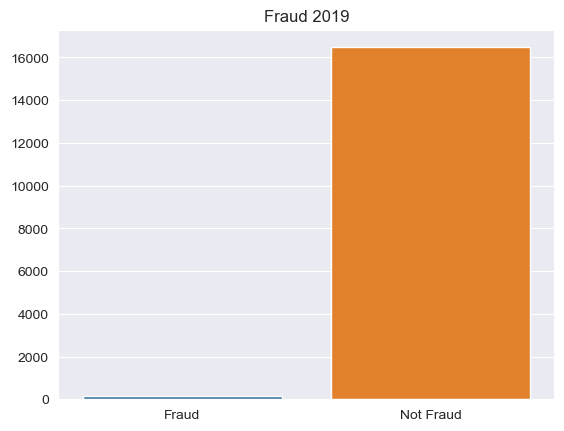

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

x = ['Fraud', 'Not Fraud']
y = [166,16475]

sns.barplot(x, y,x = "Class", y = "Number of transactions").set(title='Fraud 2019')
plt.show()

In [31]:
df_model2.groupby(['class'])['class'].count()

class
0    16727
1      836
Name: class, dtype: int64

C:\Users\Jenny.Son\Anaconda3\envs\geoenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


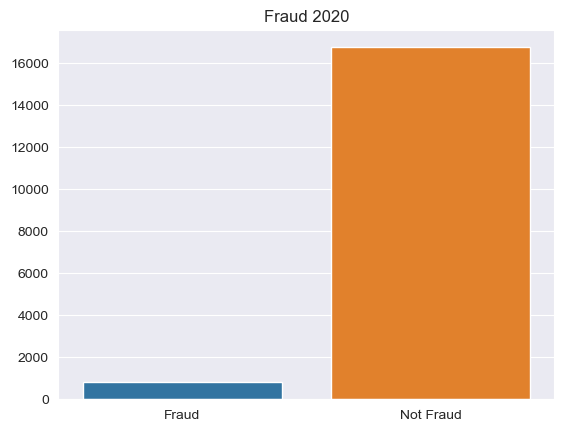

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

x = ['Fraud', 'Not Fraud']
y = [836,16727]

sns.barplot(x, y,x = "Class", y = "Number of transactions").set(title='Fraud 2020')
plt.show()

In [33]:
df_model3.groupby(['class'])['class'].count()

class
0    16677
1     1683
Name: class, dtype: int64

C:\Users\Jenny.Son\Anaconda3\envs\geoenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


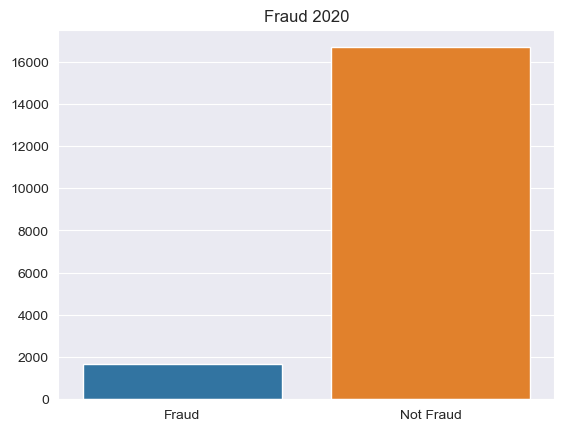

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

x = ['Fraud', 'Not Fraud']
y = [1683,16677]

sns.barplot(x, y,x = "Class", y = "Number of transactions").set(title='Fraud 2020')
plt.show()

In [35]:
# seperate target and feature variables

y = df_model1['class']
X = df_model1.drop(['class','date','year'], axis=1)

X = np.asarray(X).astype('float32')
y = np.asarray(y).astype('float32')

In [36]:
X

array([[   1.008827  ,   -0.54734945,   -0.16271833, ...,   -0.15619223,
          76.49992   ,    2.        ],
       [  -0.58335537,   -0.8472627 ,    0.5221616 , ...,    0.7469974 ,
         -56.787994  ,    2.        ],
       [   0.34281603,   -1.2033741 ,   -0.5459172 , ...,    0.657675  ,
        -128.17288   ,    4.        ],
       ...,
       [   1.438337  ,   -0.8788705 ,    2.681812  , ...,    0.14131993,
         -54.16148   ,    3.        ],
       [  -0.9940759 ,    1.0472358 ,    0.15397257, ...,   -0.9113419 ,
         -48.210613  ,    7.        ],
       [  -1.4577951 ,    0.39505047,    1.7179573 , ...,    1.3186613 ,
        -139.61598   ,    8.        ]], dtype=float32)

In [37]:
y

array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)

define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(256, input_shape=(X.shape[1],), activation='sigmoid'))

In [38]:
model = Sequential() 
model.add(Dense(512, input_shape=(X.shape[1],), activation='relu', input_dim=3)) 
model.add(Dense(512, activation='relu')) 
model.add(Dense(1)) 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [39]:

# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)


Epoch 1/150
1665/1665 [==============================] - 6s 3ms/step - loss: 0.1539 - accuracy: 0.9900
Epoch 2/150
1665/1665 [==============================] - 5s 3ms/step - loss: 0.1539 - accuracy: 0.9900
Epoch 3/150
1665/1665 [==============================] - 5s 3ms/step - loss: 0.1539 - accuracy: 0.9900
Epoch 4/150
1665/1665 [==============================] - 5s 3ms/step - loss: 0.1539 - accuracy: 0.9900
Epoch 5/150
1665/1665 [==============================] - 5s 3ms/step - loss: 0.1539 - accuracy: 0.9900
Epoch 6/150
1665/1665 [==============================] - 5s 3ms/step - loss: 0.1539 - accuracy: 0.9900
Epoch 7/150
1665/1665 [==============================] - 5s 3ms/step - loss: 0.1539 - accuracy: 0.9900
Epoch 8/150
1665/1665 [==============================] - 5s 3ms/step - loss: 0.1539 - accuracy: 0.9900
Epoch 9/150
1665/1665 [==============================] - 5s 3ms/step - loss: 0.1539 - accuracy: 0.9900
Epoch 10/150
1665/1665 [==============================] - 5s 3ms/step - l

In [40]:

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

521/521 [==============================] - 1s 2ms/step - loss: 0.1539 - accuracy: 0.9900
Accuracy: 99.00


In [41]:
# make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

521/521 [==============================] - 1s 2ms/step
[1.0088269710540771, -0.5473494529724121, -0.16271832585334778, -0.502410888671875, -1.669553279876709, 2.298523187637329, -0.2898360788822174, 0.7191422581672668, -0.8806220293045044, -0.9060422778129578, 1.8113949298858643, 0.6736957430839539, -0.38333606719970703, -0.29760366678237915, -0.6126746535301208, -1.3343015909194946, -0.3651871383190155, 1.4547866582870483, 0.8402197957038879, -0.15619222819805145, 76.49992370605469, 2.0] => 0 (expected 0)
[-0.5833553671836853, -0.8472626805305481, 0.522161602973938, 0.36719974875450134, 0.440054714679718, 0.2570175528526306, -1.3852308988571167, -0.6023147702217102, -0.30222436785697937, 2.2128841876983643, 1.0905888080596924, 0.6435309052467346, -1.47550368309021, 0.2993910610675812, -1.206749439239502, 0.5423809885978699, 1.7711074352264404, 0.07249664515256882, -0.4365901052951813, 0.7469974160194397, -56.787994384765625, 2.0] => 0 (expected 0)
[0.342816025018692, -1.20337414741516

In [42]:
# evaluate the keras model on test data 2020

# seperate target and feature variables

y = df_model2['class']
X = df_model2.drop(['class','date','year'], axis=1)

X = np.asarray(X).astype('float32')
y = np.asarray(y).astype('float32')


_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

549/549 [==============================] - 1s 2ms/step - loss: 0.7342 - accuracy: 0.9524
Accuracy: 95.24


In [43]:
# evaluate the keras model on test data 2021

# seperate target and feature variables

y = df_model3['class']
X = df_model3.drop(['class','date','year'], axis=1)

X = np.asarray(X).astype('float32')
y = np.asarray(y).astype('float32')


_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

574/574 [==============================] - 1s 2ms/step - loss: 1.4140 - accuracy: 0.9083
Accuracy: 90.83


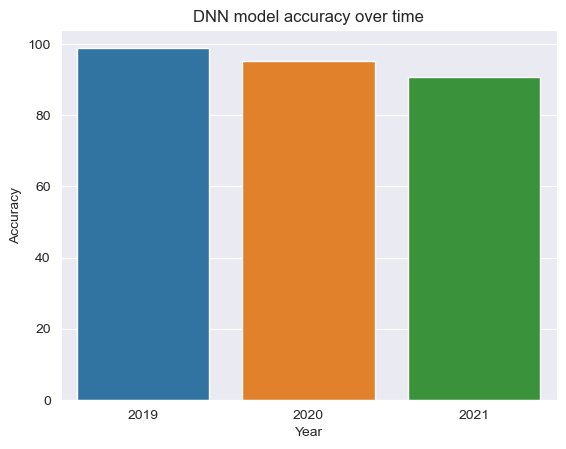

In [78]:
Year = [2019,2020,2021]
Accuracy = [99.00, 95.24, 90.83]

data_plot = pd.DataFrame({"Year":Year, "Accuracy":Accuracy})

sns.barplot(x = "Year", y = "Accuracy", data=data_plot).set(title='DNN model accuracy over time')
plt.show()

# Apply PSO optimization

In [44]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


# Import PySwarms
import pyswarms as ps



In [45]:
# seperate target and feature variables

y = df_model1['class']
X = df_model1.drop(['class','date','year'], axis=1)

X = np.asarray(X).astype('float32')
y = np.asarray(y).astype('float32')

In [46]:
len(X)

16641

In [47]:
X.shape[1]

22

In [48]:
 X.shape[0]

16641

In [49]:
y.shape

(16641,)

In [58]:
# univariate mlp example
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from mealpy.swarm_based import PSO
from mealpy.evolutionary_based import FPA
from permetrics.regression import RegressionMetric

In [59]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [60]:
class HybridMlp:

    def __init__(self, dataset, n_hidden_nodes, epoch, pop_size):
        self.X_train, self.X_test, self.Y_train, self.Y_test = dataset[0], dataset[1], dataset[2], dataset[3]
        self.n_hidden_nodes = n_hidden_nodes
        self.epoch = epoch
        self.pop_size = pop_size
        self.model, self.problem, self.optimizer, self.solution, self.best_fit = None, None, None, None, None
        self.n_dims, self.n_inputs = None, None

    def create_network(self):
        # define model
        model = Sequential()
        model.add(Dense(self.n_hidden_nodes, activation='relu', input_dim=n_steps))
        model.add(Dense(1))
        # model.compile(optimizer='adam', loss='mse')
        self.model = model

    def create_problem(self):
        self.n_inputs = self.X_train.shape[1]
        self.n_dims = (self.n_inputs * self.n_hidden_nodes) + self.n_hidden_nodes + (self.n_hidden_nodes * 1) + 1
        self.problem = {
            "fit_func": self.fitness_function,
            "lb": [-1, ] * self.n_dims,
            "ub": [1, ] * self.n_dims,
            "minmax": "min",
            "obj_weights": [0.3, 0.2, 0.5],  # [mae, mse, rmse]
            "save_population": False,
        }

    def prediction(self, solution, data):
        self.decode_solution(solution)
        return self.model.predict(data)

    def training(self):
        self.create_network()
        self.create_problem()
        # self.optimizer = GWO.OriginalGWO(self.problem, self.epoch, self.pop_size)
        self.optimizer = PSO.OriginalPSO(self.epoch, self.pop_size)
        self.solution, self.best_fit = self.optimizer.solve(self.problem, mode="thread")

        # 3 input nodes, 5 hidden node (1 single hidden layer), 1 output node
        # solution = [w11, w21, w31, w12, w22, w32, ....,  w15, w25, w35, b1, b2, b3, b4, b5, wh11, wh21, wh31, wh41, wh51, bo]
        # number of weights = number of dimensions = 3 * 5 + 5 + 5 * 1 + 1 = 26

    def decode_solution(self, solution=None):
        ## solution: vector
        ### Transfer solution back into weights of neural network
        weight_sizes = [(w.shape, np.size(w)) for w in self.model.get_weights()]
        weights = []
        cut_point = 0
        for ws in weight_sizes:
            temp = np.reshape(solution[cut_point: cut_point + ws[1]], ws[0])
            weights.append(temp)
            cut_point += ws[1]
        self.model.set_weights(weights)

    def fitness_function(self, solution):
        ## Training score and Testing score for fitness function
        ## with the weight: [0.3, 0.7]
        self.decode_solution(solution)
        predictions = self.model.predict(self.X_train)
        obj_metric = RegressionMetric(self.Y_train.flatten(), predictions.flatten())
        # mse = obj_metric.get_metric_by_name("MSE")
        # rmse = obj_metric.get_metric_by_name("RMSE")
        # mae = obj_metric.get_metric_by_name("MAE")
        results_dict = obj_metric.get_metrics_by_list_names(["RMSE", "MAE", "MSE"])
        mae, mse, rmse = results_dict["MAE"], results_dict["MSE"], results_dict["RMSE"]
        return [mae, mse, rmse]

In [61]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
# choose a number of time steps
n_steps = 3
# split into samples
X_train, Y_train = split_sequence(raw_seq[0:12], n_steps)
X_test, Y_test = split_sequence(raw_seq[12:20], n_steps)



In [62]:
## Initialization parameters
dataset = [X_train, X_test, Y_train, Y_test]
n_hidden_nodes = 5
epoch = 100
pop_size = 50

In [63]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(9, 3) (5, 3) (9,) (5,)


In [69]:
X_train

array([[ 10,  20,  30],
       [ 20,  30,  40],
       [ 30,  40,  50],
       [ 40,  50,  60],
       [ 50,  60,  70],
       [ 60,  70,  80],
       [ 70,  80,  90],
       [ 80,  90, 100],
       [ 90, 100, 110]])

In [71]:
Y_train

array([ 40,  50,  60,  70,  80,  90, 100, 110, 120])

In [72]:
Y_test

array([160, 170, 180, 190, 200])

In [70]:
X_test

array([[130, 140, 150],
       [140, 150, 160],
       [150, 160, 170],
       [160, 170, 180],
       [170, 180, 190]])

In [64]:
## Create hybrid model
model = HybridMlp(dataset, n_hidden_nodes, epoch, pop_size)
model.training()

1/1 [==============================] - 0s 45ms/step


2022/10/12 12:37:56 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: Solving 3-objective optimization problem with weights: [0.3 0.2 0.5].


1/1 [==============================] - 0s 34ms/step


2022/10/12 12:38:00 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 1, Current best: 32.206653, Global best: 32.206653, Runtime: 2.29516 seconds


1/1 [==============================] - 0s 22ms/step


2022/10/12 12:38:03 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 2, Current best: 32.206653, Global best: 32.206653, Runtime: 2.62725 seconds


1/1 [==============================] - 0s 26ms/step


2022/10/12 12:38:05 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 3, Current best: 32.206653, Global best: 32.206653, Runtime: 2.34812 seconds


1/1 [==============================] - 0s 21ms/step


2022/10/12 12:38:07 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 4, Current best: 32.206653, Global best: 32.206653, Runtime: 2.29607 seconds


1/1 [==============================] - 0s 21ms/step


2022/10/12 12:38:10 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 5, Current best: 32.206653, Global best: 32.206653, Runtime: 2.25865 seconds


1/1 [==============================] - 0s 21ms/step


2022/10/12 12:38:12 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 6, Current best: 2.71171, Global best: 2.71171, Runtime: 2.61198 seconds


1/1 [==============================] - 0s 26ms/step


2022/10/12 12:38:15 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 7, Current best: 2.71171, Global best: 2.71171, Runtime: 2.26288 seconds


1/1 [==============================] - 0s 34ms/step


2022/10/12 12:38:17 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 8, Current best: 2.71171, Global best: 2.71171, Runtime: 2.23768 seconds


1/1 [==============================] - 0s 25ms/step


2022/10/12 12:38:19 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 9, Current best: 2.71171, Global best: 2.71171, Runtime: 2.29434 seconds


1/1 [==============================] - 0s 26ms/step


2022/10/12 12:38:21 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 10, Current best: 2.71171, Global best: 2.71171, Runtime: 2.26600 seconds


1/1 [==============================] - 0s 28ms/step


2022/10/12 12:38:24 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 11, Current best: 2.4851150000000004, Global best: 2.4851150000000004, Runtime: 2.71135 seconds


1/1 [==============================] - 0s 23ms/step


2022/10/12 12:38:26 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 12, Current best: 2.4851150000000004, Global best: 2.4851150000000004, Runtime: 2.30051 seconds


1/1 [==============================] - 0s 23ms/step


2022/10/12 12:38:29 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 13, Current best: 2.4851150000000004, Global best: 2.4851150000000004, Runtime: 2.30725 seconds


1/1 [==============================] - 0s 23ms/step


2022/10/12 12:38:31 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 14, Current best: 2.4851150000000004, Global best: 2.4851150000000004, Runtime: 2.25401 seconds


1/1 [==============================] - 0s 44ms/step


2022/10/12 12:38:33 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 15, Current best: 2.4851150000000004, Global best: 2.4851150000000004, Runtime: 2.28973 seconds


1/1 [==============================] - 0s 23ms/step


2022/10/12 12:38:36 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 16, Current best: 2.4851150000000004, Global best: 2.4851150000000004, Runtime: 2.67769 seconds


1/1 [==============================] - 0s 27ms/step


2022/10/12 12:38:38 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 17, Current best: 2.4851150000000004, Global best: 2.4851150000000004, Runtime: 2.28398 seconds


1/1 [==============================] - 0s 25ms/step


2022/10/12 12:38:40 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 18, Current best: 2.4851150000000004, Global best: 2.4851150000000004, Runtime: 2.28560 seconds


1/1 [==============================] - 0s 19ms/step


2022/10/12 12:38:43 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 19, Current best: 2.4851150000000004, Global best: 2.4851150000000004, Runtime: 2.21983 seconds


1/1 [==============================] - 0s 46ms/step


2022/10/12 12:38:45 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 20, Current best: 2.190356, Global best: 2.190356, Runtime: 2.23424 seconds


1/1 [==============================] - 0s 51ms/step


2022/10/12 12:38:48 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 21, Current best: 2.190356, Global best: 2.190356, Runtime: 2.64883 seconds


1/1 [==============================] - 0s 26ms/step


2022/10/12 12:38:50 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 22, Current best: 2.190356, Global best: 2.190356, Runtime: 2.30893 seconds


1/1 [==============================] - 0s 22ms/step


2022/10/12 12:38:52 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 23, Current best: 2.190356, Global best: 2.190356, Runtime: 2.34258 seconds


1/1 [==============================] - 0s 22ms/step


2022/10/12 12:38:55 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 24, Current best: 2.190356, Global best: 2.190356, Runtime: 2.30001 seconds


1/1 [==============================] - 0s 22ms/step


2022/10/12 12:38:57 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 25, Current best: 2.190356, Global best: 2.190356, Runtime: 2.28471 seconds


1/1 [==============================] - 0s 24ms/step


2022/10/12 12:39:00 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 26, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.69350 seconds


1/1 [==============================] - 0s 21ms/step


2022/10/12 12:39:02 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 27, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.24503 seconds


1/1 [==============================] - 0s 131ms/step


2022/10/12 12:39:05 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 28, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.71226 seconds


1/1 [==============================] - 0s 22ms/step


2022/10/12 12:39:07 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 29, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.73720 seconds


1/1 [==============================] - 0s 22ms/step


2022/10/12 12:39:11 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 30, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 3.36508 seconds


1/1 [==============================] - 0s 51ms/step


2022/10/12 12:39:14 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 31, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.95728 seconds


1/1 [==============================] - 0s 31ms/step


2022/10/12 12:39:16 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 32, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.31334 seconds


1/1 [==============================] - 0s 32ms/step


2022/10/12 12:39:18 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 33, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.31993 seconds


1/1 [==============================] - 0s 24ms/step


2022/10/12 12:39:21 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 34, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.78436 seconds


1/1 [==============================] - 0s 56ms/step


2022/10/12 12:39:24 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 35, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.49084 seconds


1/1 [==============================] - 0s 23ms/step


2022/10/12 12:39:26 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 36, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.33045 seconds


1/1 [==============================] - 0s 22ms/step


2022/10/12 12:39:28 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 37, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.32604 seconds


1/1 [==============================] - 0s 22ms/step


2022/10/12 12:39:31 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 38, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.73404 seconds


1/1 [==============================] - 0s 22ms/step


2022/10/12 12:39:33 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 39, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.27197 seconds


1/1 [==============================] - 0s 17ms/step


2022/10/12 12:39:36 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 40, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.33819 seconds


1/1 [==============================] - 0s 25ms/step


2022/10/12 12:39:38 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 41, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.53126 seconds


1/1 [==============================] - 0s 19ms/step


2022/10/12 12:39:41 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 42, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.89271 seconds


1/1 [==============================] - 0s 22ms/step


2022/10/12 12:39:43 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 43, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.25434 seconds


1/1 [==============================] - 0s 24ms/step


2022/10/12 12:39:46 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 44, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.37880 seconds


1/1 [==============================] - 0s 22ms/step


2022/10/12 12:39:48 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 45, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.61759 seconds


1/1 [==============================] - 0s 26ms/step


2022/10/12 12:39:52 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 46, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 3.72769 seconds


1/1 [==============================] - 0s 24ms/step


2022/10/12 12:39:54 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 47, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.40358 seconds


1/1 [==============================] - 0s 21ms/step


2022/10/12 12:39:57 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 48, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.31782 seconds


1/1 [==============================] - 0s 21ms/step


2022/10/12 12:39:59 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 49, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.27106 seconds


1/1 [==============================] - 0s 23ms/step


2022/10/12 12:40:01 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 50, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.29862 seconds


1/1 [==============================] - 0s 31ms/step


2022/10/12 12:40:04 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 51, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.75837 seconds


1/1 [==============================] - 0s 23ms/step


2022/10/12 12:40:06 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 52, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.38423 seconds


1/1 [==============================] - 0s 23ms/step


2022/10/12 12:40:09 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 53, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.28456 seconds


1/1 [==============================] - 0s 20ms/step


2022/10/12 12:40:11 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 54, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.30588 seconds


1/1 [==============================] - 0s 22ms/step


2022/10/12 12:40:14 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 55, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.68180 seconds


1/1 [==============================] - 0s 21ms/step


2022/10/12 12:40:16 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 56, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.25546 seconds


1/1 [==============================] - 0s 22ms/step


2022/10/12 12:40:18 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 57, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.31561 seconds


1/1 [==============================] - 0s 21ms/step


2022/10/12 12:40:21 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 58, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.33860 seconds


1/1 [==============================] - 0s 22ms/step


2022/10/12 12:40:23 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 59, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.35694 seconds


1/1 [==============================] - 0s 21ms/step


2022/10/12 12:40:26 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 60, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.73725 seconds


1/1 [==============================] - 0s 22ms/step


2022/10/12 12:40:28 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 61, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.38370 seconds


1/1 [==============================] - 0s 25ms/step


2022/10/12 12:40:30 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 62, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.35589 seconds


1/1 [==============================] - 0s 24ms/step


2022/10/12 12:40:33 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 63, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.38522 seconds


1/1 [==============================] - 0s 23ms/step


2022/10/12 12:40:36 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 64, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.77266 seconds


1/1 [==============================] - 0s 26ms/step


2022/10/12 12:40:38 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 65, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.38826 seconds


1/1 [==============================] - 0s 23ms/step


2022/10/12 12:40:40 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 66, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.35688 seconds


1/1 [==============================] - 0s 22ms/step


2022/10/12 12:40:43 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 67, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.41085 seconds


1/1 [==============================] - 0s 24ms/step


2022/10/12 12:40:45 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 68, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.64265 seconds


1/1 [==============================] - 0s 24ms/step


2022/10/12 12:40:48 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 69, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.23874 seconds


1/1 [==============================] - 0s 20ms/step


2022/10/12 12:40:50 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 70, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.23751 seconds


1/1 [==============================] - 0s 22ms/step


2022/10/12 12:40:52 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 71, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.27272 seconds


1/1 [==============================] - 0s 21ms/step


2022/10/12 12:40:55 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 72, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.66471 seconds


1/1 [==============================] - 0s 20ms/step


2022/10/12 12:40:57 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 73, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.29729 seconds


1/1 [==============================] - 0s 31ms/step


2022/10/12 12:40:59 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 74, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.32119 seconds


1/1 [==============================] - 0s 16ms/step


2022/10/12 12:41:02 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 75, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.24967 seconds


1/1 [==============================] - 0s 16ms/step


2022/10/12 12:41:04 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 76, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.27778 seconds


1/1 [==============================] - 0s 21ms/step


2022/10/12 12:41:07 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 77, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.62030 seconds


1/1 [==============================] - 0s 23ms/step


2022/10/12 12:41:09 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 78, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.30674 seconds


1/1 [==============================] - 0s 16ms/step


2022/10/12 12:41:11 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 79, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.25415 seconds


1/1 [==============================] - 0s 25ms/step


2022/10/12 12:41:14 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 80, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.27053 seconds


1/1 [==============================] - 0s 21ms/step


2022/10/12 12:41:16 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 81, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.36515 seconds


1/1 [==============================] - 0s 35ms/step


2022/10/12 12:41:19 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 82, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.68213 seconds


1/1 [==============================] - 0s 31ms/step


2022/10/12 12:41:21 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 83, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.21226 seconds


1/1 [==============================] - 0s 21ms/step


2022/10/12 12:41:23 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 84, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.30083 seconds


1/1 [==============================] - 0s 21ms/step


2022/10/12 12:41:25 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 85, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.22557 seconds


1/1 [==============================] - 0s 25ms/step


2022/10/12 12:41:28 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 86, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.26729 seconds


1/1 [==============================] - 0s 24ms/step


2022/10/12 12:41:30 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 87, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.72366 seconds


1/1 [==============================] - 0s 24ms/step


2022/10/12 12:41:33 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 88, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.44606 seconds


1/1 [==============================] - 0s 24ms/step


2022/10/12 12:41:35 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 89, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.36894 seconds


1/1 [==============================] - 0s 27ms/step


2022/10/12 12:41:37 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 90, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.33482 seconds


1/1 [==============================] - 0s 21ms/step


2022/10/12 12:41:40 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 91, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.70426 seconds


1/1 [==============================] - 0s 39ms/step


2022/10/12 12:41:42 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 92, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.32313 seconds


1/1 [==============================] - 0s 24ms/step


2022/10/12 12:41:45 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 93, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.42447 seconds


1/1 [==============================] - 0s 21ms/step


2022/10/12 12:41:47 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 94, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.37122 seconds


1/1 [==============================] - 0s 16ms/step


2022/10/12 12:41:50 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 95, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.25613 seconds


1/1 [==============================] - 0s 16ms/step


2022/10/12 12:41:52 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 96, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.67741 seconds


1/1 [==============================] - 0s 31ms/step


2022/10/12 12:41:55 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 97, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.30551 seconds


1/1 [==============================] - 0s 23ms/step


2022/10/12 12:41:57 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 98, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.30931 seconds


1/1 [==============================] - 0s 64ms/step


2022/10/12 12:41:59 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 99, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 2.60592 seconds


1/1 [==============================] - 0s 39ms/step


2022/10/12 12:42:03 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 100, Current best: 0.8842749999999999, Global best: 0.8842749999999999, Runtime: 3.32364 seconds


In [65]:
## Access to the best model
# model.solution

## Predict the up coming time-series points
data = X_test

yhat = model.prediction(model.solution, data)
print(yhat)



1/1 [==============================] - 0s 23ms/step
[[-576.0424 ]
 [-618.1836 ]
 [-660.3247 ]
 [-702.4658 ]
 [-744.60693]]


In [68]:
# evaluate on test set
yhat = model.prediction(solution=model.solution, data=X_test)
yhat = np.argmax(yhat, axis=-1).astype('int')
acc = accuracy_score(Y_test, yhat)
print('Accuracy: %.3f' % acc)

1/1 [==============================] - 0s 22ms/step
Accuracy: 0.000


There is something wrong with Accuracy here as the data is not being correctly captured in the model process. So I will try another method. 

## Another method Training on 2019 data 

In [73]:
# !/usr/bin/env python
# Created by "Thieu" at 23:58, 14/12/2021 ----------%
#       Email: nguyenthieu2102@gmail.com            %
#       Github: https://github.com/thieu1995        %
# --------------------------------------------------%

# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/


import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from mealpy.swarm_based import GWO
from mealpy.evolutionary_based import FPA


class HybridMlp:

    def __init__(self, dataset, n_hidden_nodes, epoch, pop_size):
        self.X_train, self.y_train, self.X_test, self.y_test = dataset[0], dataset[1], dataset[2], dataset[3]
        self.n_hidden_nodes = n_hidden_nodes
        self.epoch = epoch
        self.pop_size = pop_size

        self.n_inputs = self.X_train.shape[1]
        self.model, self.problem_size, self.n_dims, self.problem = None, None, None, None
        self.optimizer, self.solution, self.best_fit = None, None, None

    def create_network(self):
        # create model
        model = Sequential()
        model.add(Dense(self.n_hidden_nodes[0], input_dim=self.n_inputs, activation='relu'))
        model.add(Dense(self.n_hidden_nodes[1], activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        # Compile model
        # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        self.model = model
        self.problem_size = self.n_dims = np.sum([np.size(w) for w in self.model.get_weights()])

    def create_problem(self):
        self.problem = {
            "fit_func": self.fitness_function,
            "lb": [-1, ] * self.n_dims,
            "ub": [1, ] * self.n_dims,
            "minmax": "max",
            "log_to": None,
            "save_population": False
        }

    def decode_solution(self, solution):
        # solution: is a vector.
        # solution = [w11, w21, w31, w12, w22, w32, b1, b2, wh11, wh21, wh12, wh22, wh13, wh23, bo1, bo2, bo3 ]
        # number of weights = n_inputs * n_hidden_nodes + n_hidden_nodes + n_hidden_nodes * n_outputs + n_outputs
        # we decode the solution into the neural network weights
        # we return the model with the new weight (weight from solution)
        weight_sizes = [(w.shape, np.size(w)) for w in self.model.get_weights()]
        # ( (3, 5),  15 )
        weights = []
        cut_point = 0
        for ws in weight_sizes:
            temp = np.reshape(solution[cut_point: cut_point + ws[1]], ws[0])
            # [0: 15], (3, 5),
            weights.append(temp)
            cut_point += ws[1]
        self.model.set_weights(weights)

    def prediction(self, solution, x_data):
        self.decode_solution(solution)
        return self.model.predict(x_data)

    def training(self):
        self.create_network()
        self.create_problem()
        self.optimizer = GWO.OriginalGWO(self.epoch, self.pop_size)
        # self.optimizer = FPA.OriginalFPA(self.problem, self.epoch, self.pop_size)
        self.solution, self.best_fit = self.optimizer.solve(self.problem)

    def fitness_function(self, solution):  # Used in training process
        # Assumption that we have 3 layer , 1 input layer, 1 hidden layer and 1 output layer
        # number of nodes are 3, 2, 3
        # solution = [w11, w21, w31, w12, w22, w32, b1, b2, wh11, wh21, wh12, wh22, wh13, wh23, bo1, bo2, bo3 ]
        self.decode_solution(solution)
        yhat = self.model.predict(self.X_train)
        yhat = np.argmax(yhat, axis=-1).astype('int')
        acc = accuracy_score(self.y_train, yhat)
        return acc


# load pima indians dataset
#dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
#X = dataset[:, 0:8]
#Y = dataset[:, 8]

Y = df_model1['class']
X = df_model1.drop(['class','date','year'], axis=1)

cut = int(0.6 * len(X))  # 60% for training, 40% for testing
X_train, X_test = X[0: cut], X[cut:]
y_train, y_test = Y[0: cut], Y[cut:]
dataset = [X_train, y_train, X_test, y_test]

n_hidden_nodes = [10, 5]
epoch = 50
pop_size = 50

# define model
model = HybridMlp(dataset, n_hidden_nodes, epoch, pop_size)
# fit model
model.training()

# access to the best model - best set of weights - the final weights of neural network
# model.solution

# evaluate on test set
yhat = model.prediction(solution=model.solution, x_data=X_test)
yhat = np.argmax(yhat, axis=-1).astype('int')
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

312/312 [==============================] - 0s 1ms/step


312/312 [==============================] - 0s 1ms/step


312/312 [==============================] - 0s 1ms/step


312/312 [==============================] - 0s 1ms/step


312/312 [==============================] - 0s 1ms/step


312/312 [==============================] - 0s 1ms/step


312/312 [==============================] - 0s 1ms/step


312/312 [==============================] - 0s 1ms/step


312/312 [==============================] - 0s 1ms/step


312/312 [==============================] - 0s 1ms/step


312/312 [==============================] - 0s 1ms/step


312/312 [==============================] - 0s 1ms/step


312/312 [==============================] - 0s 1ms/step


312/312 [==============================] - 0s 1ms/step


312/312 [==============================] - 0s 1ms/step


312/312 [==============================] - 0s 1ms/step


312/312 [==============================] - 0s 1ms/step


209/209 [==============================] - 0s 1ms/step
Accuracy: 0.975


# Test on 2020 dataset

In [76]:
# evaluate the keras model on test data 2020

# seperate target and feature variables

y = df_model2['class']
X = df_model2.drop(['class','date','year'], axis=1)

# evaluate on test set
yhat = model.prediction(solution=model.solution, x_data=X)
yhat = np.argmax(yhat, axis=-1).astype('int')
acc = accuracy_score(y, yhat)
print('Accuracy: %.3f' % acc)

549/549 [==============================] - 1s 1ms/step
Accuracy: 0.952


# Test on 2021 dataset

In [77]:
# evaluate the keras model on test data 2020

# seperate target and feature variables

y = df_model3['class']
X = df_model3.drop(['class','date','year'], axis=1)

# evaluate on test set
yhat = model.prediction(solution=model.solution, x_data=X)
yhat = np.argmax(yhat, axis=-1).astype('int')
acc = accuracy_score(y, yhat)
print('Accuracy: %.3f' % acc)

574/574 [==============================] - 1s 1ms/step
Accuracy: 0.908


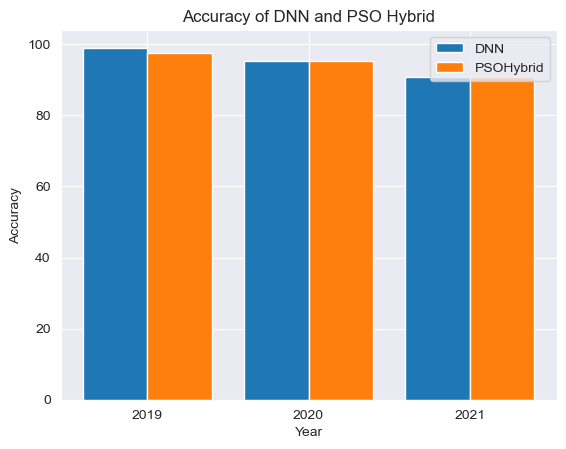

In [82]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['2019','2020','2021']
DNN = [99,95.24,90.83]
PSO_Hybrid = [97.5,95.2,90.8]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, DNN, 0.4, label = 'DNN')
plt.bar(X_axis + 0.2, PSO_Hybrid, 0.4, label = 'PSOHybrid')
  
plt.xticks(X_axis, X)
plt.xlabel("Year")
plt.ylabel("Accuracy")
plt.title("Accuracy of DNN and PSO Hybrid")
plt.legend()
plt.show()